In [82]:
import torch, numpy as np, matplotlib.pyplot as plt, seaborn as sns
sns.set_style('darkgrid') 
import pathlib
print( torch.__version__ )


2.3.1+cu121


# Finite Difference Derivatives

Finite difference methods are numerical techniques used to approximate the derivatives of functions using their values at discrete points.

## First Derivative Approximations

### Forward Difference

The forward difference formula approximates the first derivative of a function $( f(x) )$ at a point $( x_i )$ using the function value at $( x_i )$ and $( x_{i+1} )$:

$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{\Delta x}]
$$

where $( \Delta x = x_{i+1} - x_i )$ is the step size.

### Backward Difference

The backward difference formula uses the function value at $( x_i )$ and $( x_{i-1} )$ to approximate the first derivative:

$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{\Delta x}
$$


### Central Difference

The central difference formula provides a more accurate approximation of the first derivative by using the function values at $( x_{i+1} )$ and $( x_{i-1} )$:

$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2\Delta x}
$$

This formula is second-order accurate, meaning the error decreases quadratically as the step size decreases.

## Second Derivative Approximation

The second derivative of a function $ f(x) $ can be approximated using the central difference formula:

$$

f''(x_i) \approx \frac{f(x_{i+1}) - 2f(x_i) + f(x_{i-1})}{\Delta x^2}

$$

This approximation is useful in solving second-order partial differential equations, such as the heat equation.


# Heat equation 


$$
\frac{\partial u}{\partial t} = \kappa  \left(  \frac{\partial u} {\partial^2x} + \frac{\partial u} {\partial^2y}   \right)  
$$

## 1D

It is known that the explicit finite difference or finite element schemes for the heat equation are 
stable only if the time step Δt is of the order O(Δx2), or smaller  


(23999, 100)

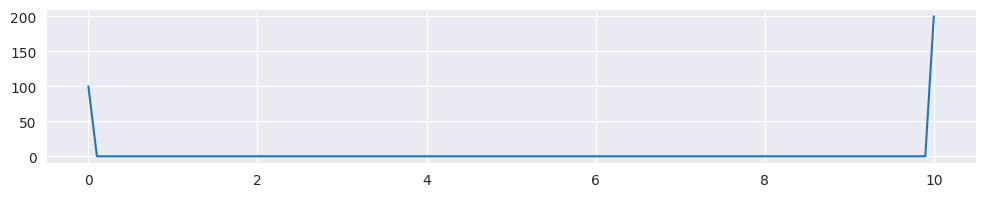

In [138]:
spacing = 0.1 
dx = spacing 
k = 2.89
length = 10 
temp_left = 100 
temp_right = 200 
tot_sim_time = 30.0 

dt = 0.125*dx*dx# 0.001 


x_vector = np.linspace( 0.0, length, int( length/spacing) )
t_vector = np.linspace( 0.0, tot_sim_time,  int(tot_sim_time/dt) )
 

#BC 
u = np.zeros( [len(t_vector), len( x_vector)] )
u[:,0] = 100
u[:,-1:] = 200

plt.figure(figsize=(12, 2))  # Width=10 inches, Height=5 inches
plt.plot( x_vector, u[0] ) 

u.shape 

In [139]:
# explicit calculation

steps = u.shape[0] - 1 

for t in range( 1, steps  ):

    for x in range( 1, len( x_vector) -1 ):
        u[t+1,x] = u[t,x] + (k*(dt/dx**2)) * ( u[t, x+1] -2.0*u[t,x] + u[t,x-1] )


print('done')

done


In [140]:
u.shape

(23999, 100)

0


<Figure size 1200x200 with 0 Axes>

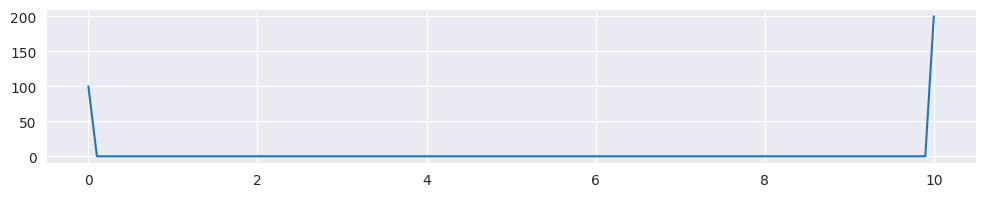

4799


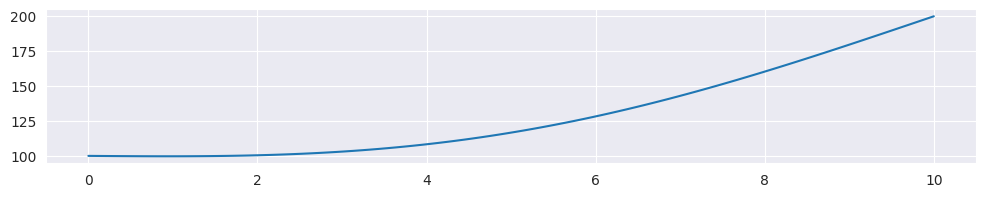

9598


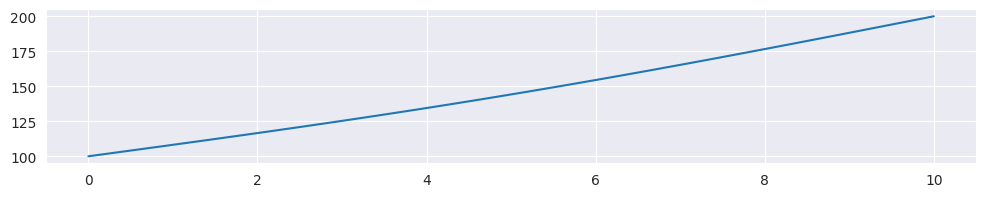

14397


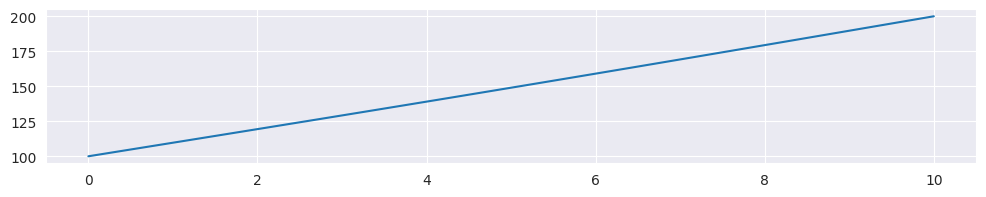

19196


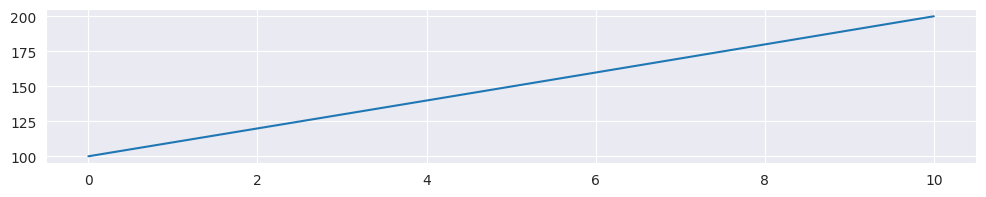

23995


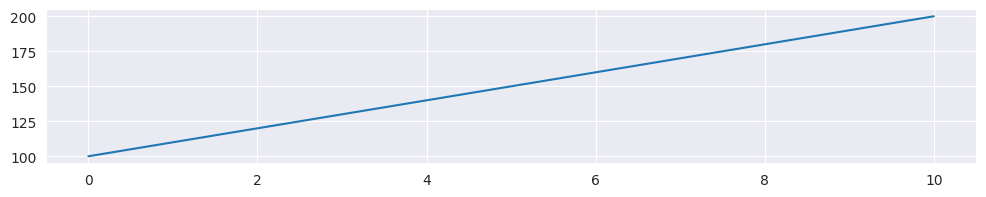

In [141]:
plt.figure(figsize=(12, 2))  # Width=10 inches, Height=5 inches

N = 5 
max = u.shape[0]-1
delta = int( max/N)
 

for n in range( N + 1):
    print( n*delta )
    plt.figure(figsize=(12, 2))
    plt.plot( x_vector, u[ n*delta ] ) 
    plt.show()



In [137]:
u.shape

(23999, 100)

In [54]:
ones = torch.ones( (3,1), dtype = torch.float )
twos = 2*torch.ones( (3,1), dtype = torch.float )
print( ones )
print( twos )
print()

print('-------')
torch.sum(twos*ones).item() 



tensor([[1.],
        [1.],
        [1.]])
tensor([[2.],
        [2.],
        [2.]])

-------


6.0

In [42]:
a = torch.rand( 2,2 )
b = torch.ones( 2,2 )

torch.dot( a,b ) 


RuntimeError: 1D tensors expected, but got 2D and 2D tensors